## Test 2:Feed Forward NN on Cifar10

In [5]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

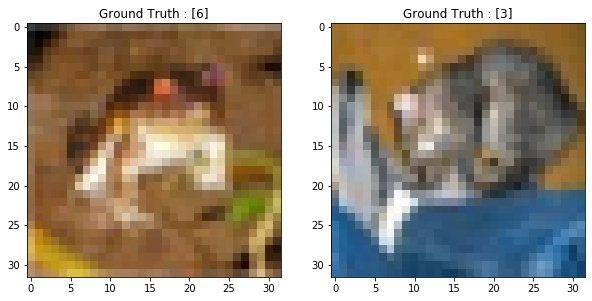

In [7]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [8]:
import datetime
datetime.datetime.now()

datetime.datetime(2019, 10, 9, 16, 27, 51, 521402)

In [9]:
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)
train_data.shape

(50000, 3072)

In [10]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [11]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [16]:
model = Sequential()
model.add(Dense(1024, activation='linear', input_shape=(dimData,)))
model.add(Dense(1024, activation='linear'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [17]:
# For a multi-class classification problem
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
start = datetime.datetime.now()

In [19]:
history = model.fit(train_data, train_labels_one_hot, batch_size=128, epochs=3, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot),
                   shuffle = True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 26s 516us/step - loss: 2.6586 - accuracy: 0.2762 - val_loss: 1.7861 - val_accuracy: 0.3575
Epoch 2/3
50000/50000 [==============================] - 26s 514us/step - loss: 1.7142 - accuracy: 0.3830 - val_loss: 1.6822 - val_accuracy: 0.3927
Epoch 3/3
50000/50000 [==============================] - 26s 512us/step - loss: 1.6232 - accuracy: 0.4205 - val_loss: 1.5842 - val_accuracy: 0.4393


In [20]:
end = datetime.datetime.now()
diff_time = end - start
print(diff_time)

0:01:18.362793


In [21]:
# Score trained model.
scores = model.evaluate(test_data, test_labels_one_hot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 198us/step
Test loss: 1.5841517419815063
Test accuracy: 0.439300000667572


Text(0.5, 1.0, 'Accuracy Curves')

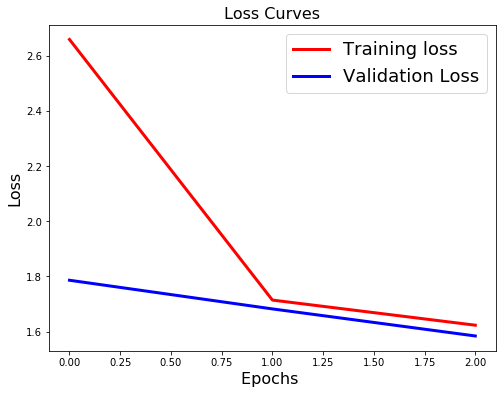

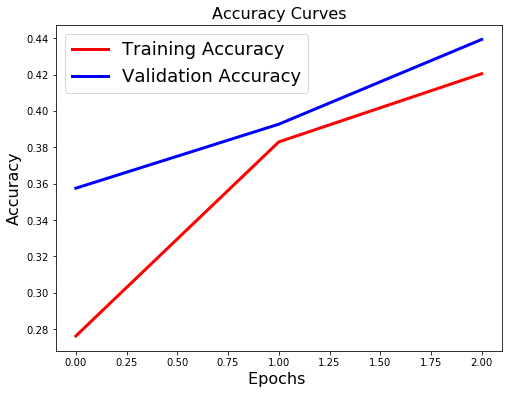

In [26]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)